In [1]:
import numpy as np
from numpy import linalg as lg
import matplotlib.pyplot as plt
import math as mh
import pandas as pd

In [2]:
# Export data from txt
data = np.loadtxt('experiment_3.txt')
M = data.shape[0]
data.shape[0]
print(data.shape)

(7806, 2)


In [3]:
# Monoms and result
def Mtx (N, len, data):
    A = np.zeros((len, N))

    for i in range(0, len):
        for k in range(0, N):
            A[i,k] = (data[i,0])**k

    Y = np.zeros(len)
    for i in range(0, len):
        Y[i] = data[i,1]
    print(Y)    
        
    return [A, Y]

In [4]:
def Givens(A, Y):
    n = A.shape[1]
    AC = A.copy()
    YC = Y.copy()
     
    # Givens
    for i in range(0,n):
        for j in range(i + 1 , M):
            c = AC[i,i] / (AC[i,i]**2 + AC[j,i]**2) ** .5
            s = AC[j,i] / ((AC[i,i])**2 + (AC[j,i])**2) ** .5
            tmp1 = AC[i,:] * c + AC[j,:] * s
            tmp2 = AC[i,:] * -s + AC[j,:] * c
            AC[i, :] = tmp1
            AC[j, :] = tmp2
            tmp3 = YC[i] * c + YC[j] * s
            tmp4 = YC[i] * (-s) + YC[j] * c
            YC[i] = tmp3
            YC[j] = tmp4
            
    
    # Gauss method_back
    
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        sum = 0
        for j in range(i+1, n):
            sum = sum + AC[i,j]*x[j]

        x[i] = (YC[i] - sum) / AC[i,i]
    return x


In [5]:
def Coeff (A, Y):
    At = np.transpose(A)
    AH = np.dot(At,A)
    YH = np.dot(At,Y)
    AH_inv = lg.inv(AH)
    C = np.dot(AH_inv,YH)
    return C

In [6]:
def NU (N, C):    
    approx = np.zeros(M)
    for i in range(0,M):
        for n in range(0,N):
            approx[i] = approx[i] + C[n]*(data[i][0]**n)
    
    return approx

In [7]:
def SME (approx):
    sum = 0
    for i in range(0,M):
        sum = sum + abs(approx[i]-data[i,1])**2
    sme = ((sum/M)**(1/2))/np.amax(data, axis=0)[1]
    return sme

In [8]:
d = {"mu(AtA)":np.zeros(12),"SME(NE)":np.zeros(12),"mu(A)":np.zeros(12),"SME(QR)":np.zeros(12)}
df = pd.DataFrame(d, index=['1', '2', '3','4','5','6','7','8','9','10','11','12'])

In [9]:
for N in range(1,13):  
    list = Mtx(N, M, data)
    
    C = Coeff(np.array(list[0]),np.array(list[1]))
    Y_int = NU(N, C)
    
    C_Giv = Givens(np.array(list[0]),np.array(list[1]))
    Y_Giv = NU(N, C_Giv)
    

    df.iat[N-1,0] = np.linalg.cond(np.dot(list[0].transpose(), list[0]))
    df.iat[N-1,1] = SME(Y_int)
    
    
    df.iat[N-1,2] = lg.cond(list[0])
    df.iat[N-1,3] = SME(Y_Giv)
    


[0.00000e+00 8.56050e-02 1.71210e-01 ... 6.13034e+02 6.13115e+02
 6.13177e+02]
(7806, 1)
[0.00000e+00 8.56050e-02 1.71210e-01 ... 6.13034e+02 6.13115e+02
 6.13177e+02]
(7806, 2)
[0.00000e+00 8.56050e-02 1.71210e-01 ... 6.13034e+02 6.13115e+02
 6.13177e+02]
(7806, 3)
[0.00000e+00 8.56050e-02 1.71210e-01 ... 6.13034e+02 6.13115e+02
 6.13177e+02]
(7806, 4)
[0.00000e+00 8.56050e-02 1.71210e-01 ... 6.13034e+02 6.13115e+02
 6.13177e+02]
(7806, 5)
[0.00000e+00 8.56050e-02 1.71210e-01 ... 6.13034e+02 6.13115e+02
 6.13177e+02]
(7806, 6)
[0.00000e+00 8.56050e-02 1.71210e-01 ... 6.13034e+02 6.13115e+02
 6.13177e+02]
(7806, 7)
[0.00000e+00 8.56050e-02 1.71210e-01 ... 6.13034e+02 6.13115e+02
 6.13177e+02]
(7806, 8)
[0.00000e+00 8.56050e-02 1.71210e-01 ... 6.13034e+02 6.13115e+02
 6.13177e+02]
(7806, 9)
[0.00000e+00 8.56050e-02 1.71210e-01 ... 6.13034e+02 6.13115e+02
 6.13177e+02]
(7806, 10)
[0.00000e+00 8.56050e-02 1.71210e-01 ... 6.13034e+02 6.13115e+02
 6.13177e+02]
(7806, 11)
[0.00000e+00 8.5605

In [10]:
print(df)

         mu(AtA)   SME(NE)         mu(A)   SME(QR)
1   1.000000e+00  0.290668  1.000000e+00  0.290668
2   3.422457e+02  0.006634  1.849988e+01  0.006634
3   1.452589e+05  0.002938  3.811284e+02  0.002938
4   6.498698e+07  0.000669  8.061450e+03  0.000669
5   3.010977e+10  0.000664  1.735217e+05  0.000664
6   1.420157e+13  0.000625  3.768497e+06  0.000625
7   6.773324e+15  0.000482  8.230020e+07  0.000482
8   3.279243e+18  0.000464  1.810868e+09  0.000464
9   1.607589e+21  0.000384  4.009484e+10  0.000384
10  7.926690e+23  0.000339  8.904083e+11  0.000338
11  3.927756e+26  0.000670  1.983990e+13  0.000336
12  1.870616e+29  0.007599  4.439792e+14  0.000302


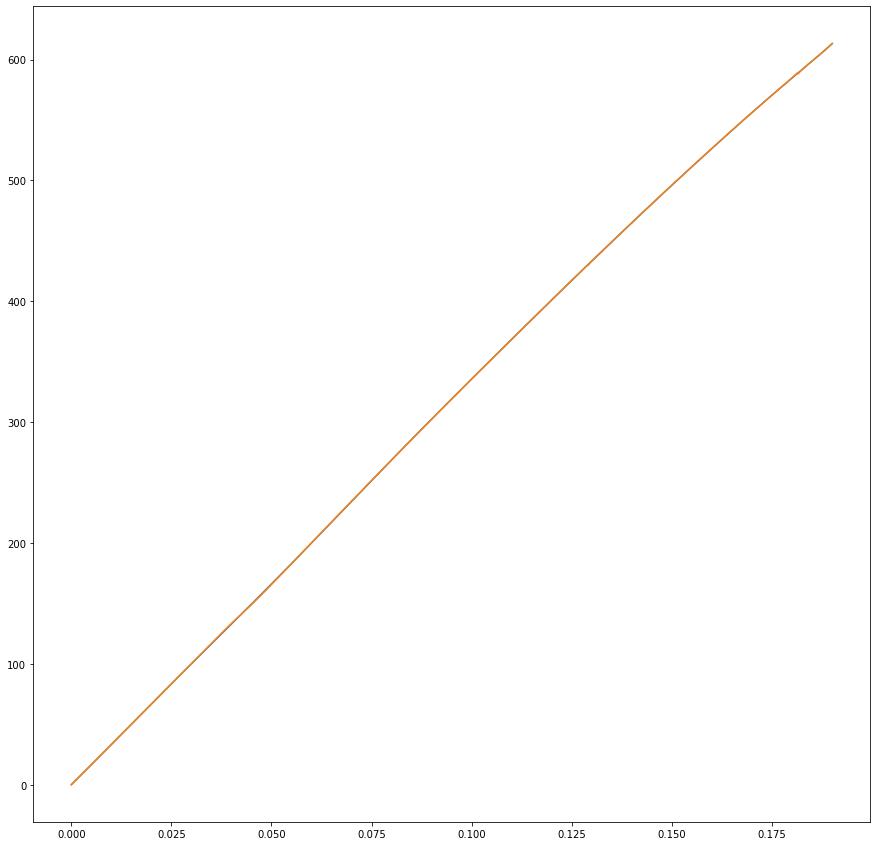

In [11]:
px = data[0:M,0]
py = data[0:M,1]

plt.figure(figsize=(15, 15))

plt.plot(px, Y_Giv)
plt.plot(px, py)